# 7. Modeling and Salary Prediction using Scikit-learn

 In this notebook, I conducted correlation analysis to explore the relationships between features and both maximum and minimum salaries.
The goal was to identify significant features relevant to predicting salaries.

## Notebook Overview:
 - Importing Required Libraries: We begin by installing scikit-learn and importing all necessary resources for data processing, modeling, tuning, and testing the models.

 - Loading Data: The dataset "processed_job_descriptions.csv," previously processed, will be loaded to initiate data exploration and further processing using PySpark functionalities.

 - Data Preprocessing: Data preprocessing steps include one-hot encoding, feature scaling, and splitting into 80:20 ratio for training and testing.

 - Modeling, Training, Tuning, and Testing: This step involves training and evaluating individual models, starting from linear regression to XGBoost. We apply 5-fold cross-validation for generalization and grid search for tuning hyperparameters. Performance evaluation on the testing set (20% of the data) will be based on Mean Squared Error and R2 score.

 - Visualization of Performance: Matplotlib will be utilized to visualize the performance measures for all models.

By following these steps, we aim to build robust models for salary prediction, leveraging scikit-learn's powerful machine learning capabilities. 


In [ ]:
pip install scikit-learn

### Importing Required Resoucres

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Data Preprocessing

In [2]:
import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

# Loading dataset
data = pd.read_csv('processed_job_descriptions.csv')

# Selecting 100,000 data points randomly
data_sample = data.sample(n=100, random_state=42)

# Separate features and target variables
X = data_sample.drop(['Max Salary', 'Min Salary'], axis=1)
y = data_sample[['Max Salary', 'Min Salary']]

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_encoded = StandardScaler()
X_train = scaler_encoded.fit_transform(X_train_encoded)
X_test = scaler_encoded.transform(X_test_encoded)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Recursive Feature Elimination
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_poly, y_train)
X_test_rfe = rfe.transform(X_test_poly)

# Get selected feature names
selected_feature_names = [feature for feature, selected in zip(X_encoded.columns, rfe.support_) if selected]

# Print selected feature names
print("Selected Features:")
print(selected_feature_names)

KeyboardInterrupt: 

### Linear Regression

In [5]:
# Initializing model
linear_reg = LinearRegression()

# Defining hyperparameters (Linear Regression doesn't have hyperparameters to tune like Lasso or Ridge)
param_grid = {}  # Empty dictionary as Linear Regression doesn't have specific hyperparameters

# Performing GridSearchCV (Not for hyperparameter tuning, but for consistency)
grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fitting the model on the entire training data
grid_search.fit(X_train, y_train)

# Using the best model obtained directly (as Linear Regression doesn't have hyperparameters to tune)
best_linear_reg = grid_search.best_estimator_
best_linear_reg.fit(X_train, y_train)

# Predicting on the test set using the final model
y_pred = best_linear_reg.predict(X_test)

# Calculating RMSE (Root Mean Squared Error) on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean Squared Error: 126207484.89037213
R-squared (R2) Score: -0.11780873774987277


### Lasso Regression

In [6]:
# Initializing model
lasso_reg = Lasso()

# Defining hyperparameters 
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

# Performing GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fitting the model on the entire training data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Using the best hyperparameters to create the final model
best_lasso_reg = Lasso(**best_params)
best_lasso_reg.fit(X_train, y_train)

# Predicting on the test set using the final model
y_pred = best_lasso_reg.predict(X_test)

# Calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mean Squared Error: 115204744.41188267
R-squared (R2) Score: -0.012896953719612969


### Ridge Regression

In [9]:
#initializing model
ridge_reg = Ridge()

#defining hyperparameters for tuning
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Regularization strength
}

#performing GridSearchCV to tune hyperparameter
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_ridge_reg = Ridge(**best_params)
best_ridge_reg.fit(X_train, y_train)

#predict on the test set using the final model
y_pred = best_ridge_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = (mean_squared_error(y_test, y_pred))
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mean Squared Error: 116228284.22941205
R-squared (R2) Score: -0.028247699374661428


### Decision Tree

In [8]:
#initializing model 
tree_reg = DecisionTreeRegressor()

#defining hyperparameters for tuning
param_grid = {
    'max_depth': [3, 5, 7, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

#performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data with hyperparameter tuning
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_tree_reg = DecisionTreeRegressor(**best_params)
best_tree_reg.fit(X_train, y_train)

#predicting on the test set using the final model
y_pred = best_tree_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mean Squared Error: 113072521.97086218
R-squared (R2) Score: -0.0011107727036706594


### Random Forest

In [22]:
#initializing model 
forest_reg = RandomForestRegressor()

#defining hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3]  # Minimum number of samples required to be at a leaf node
}

#performing GridSearchCV to tune hyperparameter 
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

#fitting the model on the entire training data 
grid_search.fit(X_train, y_train)

#getting the best hyperparameters
best_params = grid_search.best_params_

#using the best hyperparameters to create the final model
best_forest_reg = RandomForestRegressor(**best_params)
best_forest_reg.fit(X_train, y_train)

#predicting on the test set using the final model
y_pred = best_forest_reg.predict(X_test)

#calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mean Squared Error: 108611017.55555987
R-squared (R2) Score: -0.019073226031216528


### XGBoost

In [23]:
# Initializing XGBRegressor
xgb_reg = XGBRegressor()

# Defining hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'learning_rate': [0.1, 0.05],       # Step size shrinkage
    'max_depth': [3, 5],                # Maximum depth of a tree
    'min_child_weight': [1, 3],         # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1],                  # Minimum loss reduction required to make a further partition on a leaf node of the tree
}

# Performing GridSearchCV for tuning hyperparameters
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fitting the model on the entire training data with tuned hyperparameters
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Using the best hyperparameters to create the final model
best_xgb_reg = XGBRegressor(**best_params)
best_xgb_reg.fit(X_train, y_train)

# Predicting on the test set using the final model
y_pred = best_xgb_reg.predict(X_test)

# Calculating RMSE (Root Mean Squared Error) on test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculating R Squared Error (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mean Squared Error: 110512029.13638377
R-squared (R2) Score: -0.0554141265416922


### Visualization of Performance 

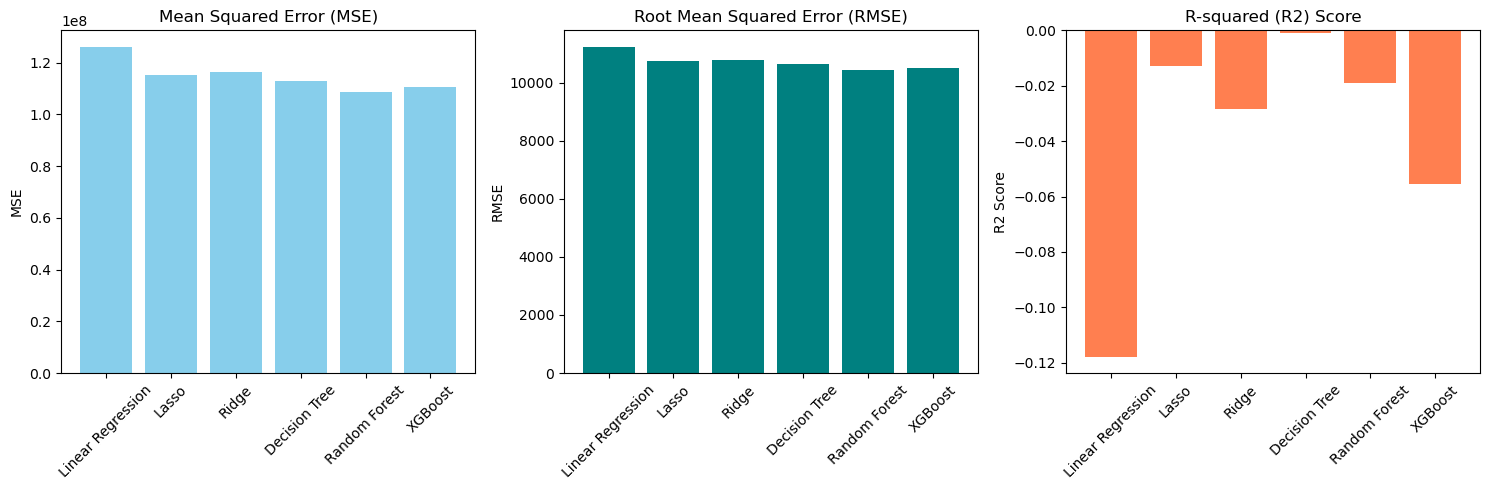

In [3]:
mse_values = {
    'Linear Regression': 126207484.89037213,
    'Lasso': 115204744.41188267,
    'Ridge': 116228284.22941205,
    'Decision Tree': 113072521.97086218,
    'Random Forest':  108611017.55555987,
    'XGBoost':  110512029.13638377
    
}

# Calculate RMSE from MSE
rmse_values = {key: np.sqrt(value) for key, value in mse_values.items()}

r_squared_values = {
    'Linear Regression': -0.11780873774987277,
    'Lasso': -0.012896953719612969,
    'Ridge': -0.028247699374661428,
    'Decision Tree': -0.0011107727036706594,
    'Random Forest':-0.019073226031216528, 
    'XGBoost':  -0.0554141265416922
    
}

# Plotting
methods = list(mse_values.keys())

plt.figure(figsize=(15, 5))

# Plot MSE
plt.subplot(1, 3, 1)
plt.bar(methods, mse_values.values(), color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plot RMSE
plt.subplot(1, 3, 2)
plt.bar(methods, rmse_values.values(), color='teal')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# Plot R-squared
plt.subplot(1, 3, 3)
plt.bar(methods, r_squared_values.values(), color='coral')
plt.title('R-squared (R2) Score')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('output_ml.png')
plt.show()
